# Deliverable 3.2: Velocity Reference Tracking

## Objective
Extend the MPC controllers from Deliverable 3.1 to track **constant velocity references** for x, y, and z directions, and a **constant angle reference** for roll.

In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [45]:
# MPC import
import numpy as np
from LinearMPC.MPCVelControl import MPCVelControl
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis, plot_static_states_inputs

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

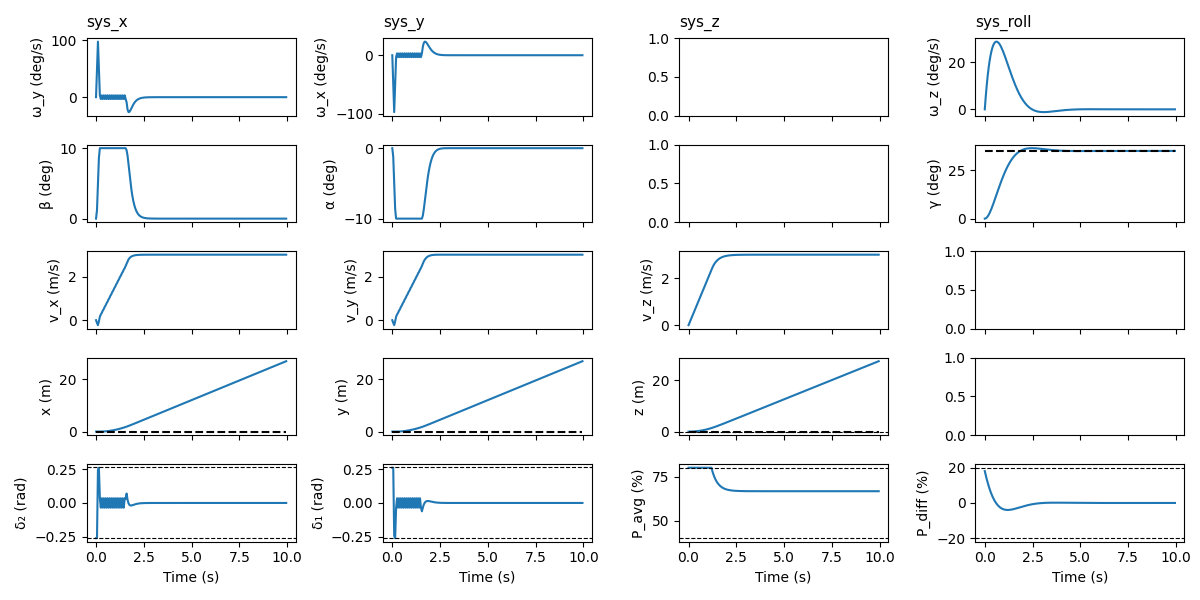

In [ ]:
Ts = 0.05
sim_time = 10
H = 7
x0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])   # initial state
    x_target = np.array([0, 0, 0, 0, 0, 0.61, 3, 3, 3, 0, 0, 0])   # target state

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0, x_target=x_target, method="linear"
)
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, x_target)

# vis = RocketVis(rocket, rocket_obj_path)
# vis.anim_rate = 1.0
# vis.animate(
#     t_cl[:-1],
#     x_cl[:, :-1],
#     u_cl,
#     Ref=x_target.reshape(-1, 1).repeat(u_cl.shape[1], axis=1),
#     T_ol=t_ol[..., :-1],
#     X_ol=x_ol,
#     U_ol=u_ol,
# );

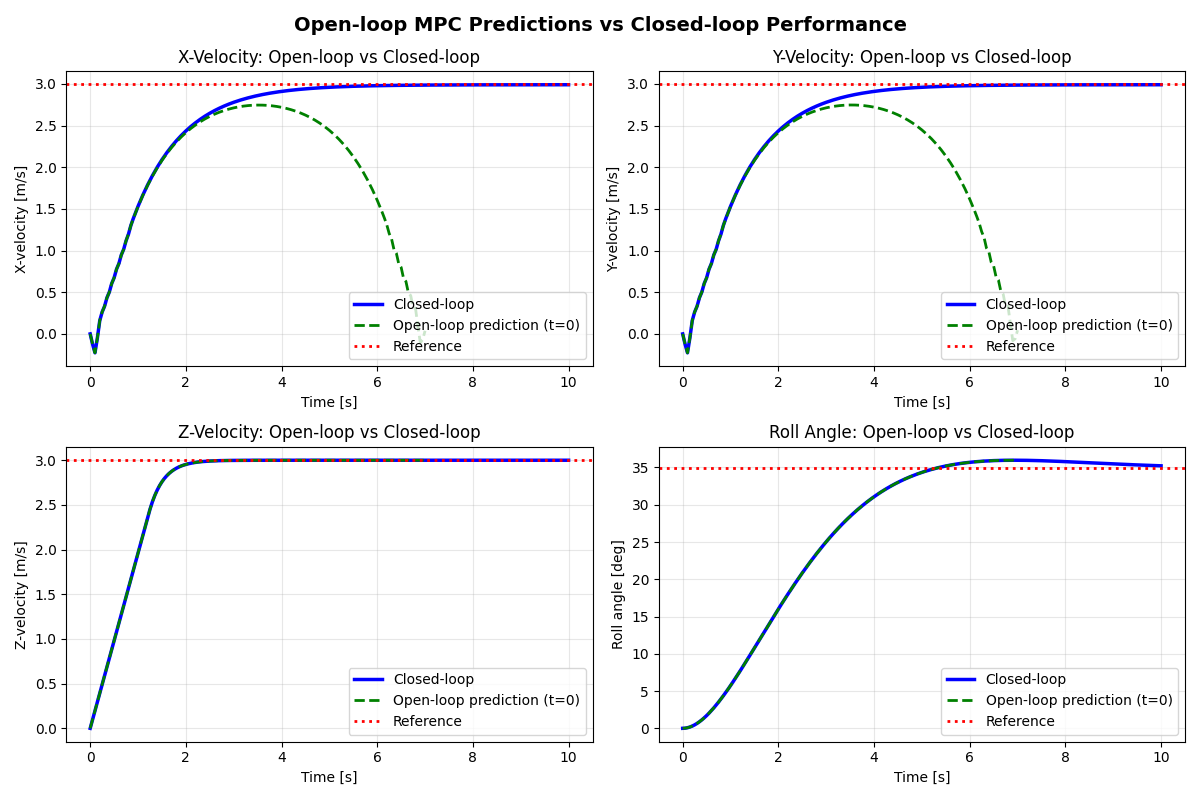


Note: The open-loop prediction (green dashed) shows what the MPC plans at t=0.
The closed-loop trajectory (blue solid) shows actual performance with feedback.


In [42]:
## Open-loop vs Closed-loop Comparison
# Show MPC predictions at first time step to illustrate planning
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Open-loop MPC Predictions vs Closed-loop Performance', fontsize=14, fontweight='bold')

# Get first open-loop prediction
t_ol_0 = t_ol[:, 0]
x_ol_0 = x_ol[:, :, 0]

# Plot 1: X-velocity
axes[0, 0].plot(t_cl, x_cl[6, :], 'b-', linewidth=2.5, label='Closed-loop')
axes[0, 0].plot(t_ol_0, x_ol_0[6, :], 'g--', linewidth=2, label='Open-loop prediction (t=0)')
axes[0, 0].axhline(y=x_target[6], color='r', linestyle=':', linewidth=2, label='Reference')
axes[0, 0].set_xlabel('Time [s]')
axes[0, 0].set_ylabel('X-velocity [m/s]')
axes[0, 0].set_title('X-Velocity: Open-loop vs Closed-loop')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Y-velocity
axes[0, 1].plot(t_cl, x_cl[7, :], 'b-', linewidth=2.5, label='Closed-loop')
axes[0, 1].plot(t_ol_0, x_ol_0[7, :], 'g--', linewidth=2, label='Open-loop prediction (t=0)')
axes[0, 1].axhline(y=x_target[7], color='r', linestyle=':', linewidth=2, label='Reference')
axes[0, 1].set_xlabel('Time [s]')
axes[0, 1].set_ylabel('Y-velocity [m/s]')
axes[0, 1].set_title('Y-Velocity: Open-loop vs Closed-loop')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Z-velocity
axes[1, 0].plot(t_cl, x_cl[8, :], 'b-', linewidth=2.5, label='Closed-loop')
axes[1, 0].plot(t_ol_0, x_ol_0[8, :], 'g--', linewidth=2, label='Open-loop prediction (t=0)')
axes[1, 0].axhline(y=x_target[8], color='r', linestyle=':', linewidth=2, label='Reference')
axes[1, 0].set_xlabel('Time [s]')
axes[1, 0].set_ylabel('Z-velocity [m/s]')
axes[1, 0].set_title('Z-Velocity: Open-loop vs Closed-loop')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Roll angle
axes[1, 1].plot(t_cl, np.rad2deg(x_cl[5, :]), 'b-', linewidth=2.5, label='Closed-loop')
axes[1, 1].plot(t_ol_0, np.rad2deg(x_ol_0[5, :]), 'g--', linewidth=2, label='Open-loop prediction (t=0)')
axes[1, 1].axhline(y=np.rad2deg(x_target[5]), color='r', linestyle=':', linewidth=2, label='Reference')
axes[1, 1].set_xlabel('Time [s]')
axes[1, 1].set_ylabel('Roll angle [deg]')
axes[1, 1].set_title('Roll Angle: Open-loop vs Closed-loop')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nNote: The open-loop prediction (green dashed) shows what the MPC plans at t=0.")
print("The closed-loop trajectory (blue solid) shows actual performance with feedback.")